# Libraries

In [ ]:
from sklearn import tree, preprocessing, svm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import LeaveOneOut
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import f1_score, recall_score, precision_recall_curve, auc, classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate, cross_val_score, cross_val_predict
# from sklearn.metrics import silhouette_score
from matplotlib.colors import ListedColormap
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, log_loss
from scipy import interp
from sklearn.svm import SVC
from sklearn import decomposition
from sklearn.preprocessing import LabelEncoder
from imblearn.ensemble import BalancedBaggingClassifier, BalancedRandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as pld
import matplotlib.font_manager
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as pld
import matplotlib.font_manager
import seaborn as sns
from collections import Counter
def warn(*args, **kwargs): pass
import warnings
warnings.warn = warn
warnings.simplefilter(action='ignore', category=FutureWarning)


# Data import

In [30]:
# Chargement du fichier

data = pd.read_csv("dataset/warburg_set_tmp_26july.csv")
data_neg = pd.read_csv("dataset/negative_set_31july.csv")
# data_neg = pd.read_csv("negative_set_31july_noNAN.csv")


# set labels for each dataset
data["label"] =  1 #positive set ( warburg genes)
data_neg["label"] =  (-1) #negative set( non warburg genes)


data = data.drop(["na_count","Genes","Unnamed: 0","CI_mean","CI_sd"],axis = 1)
data = data.dropna()


data_neg = data_neg.drop(["na_count","Genes","Unnamed: 0","CI_mean","CI_sd"],axis = 1)
data_neg = data_neg.dropna()

data_oc = data #dataset for oneclass classification

dataset_concat=pd.concat([data_neg,data])
label_concat=dataset_concat['label']


print(dataset_concat.head())
print("\n")
print("Data shape (obs, attributes): ", dataset_concat.shape)
print(sorted(Counter(label_concat).items()))
print("\n")

# For CoE attribute only svm model (to compare with our integrative strategy model)
list_coe_only=['L_C', 'L_PC', 'L_PI', 'L_HS', 'B_C', 'B_PC', 'B_PI', 'B_HS', 'Di_mean', 'Di_sd', 'plastic', 'L_N', 'L_NDi', 'B_N', 'B_NDi',
       'I']
data_coe_only= dataset_concat.drop(list_coe_only, axis = 1)


print(data_coe_only.head())
print("\n")
print("Data shape (obs, attributes): ", data_coe_only.shape)
print(sorted(Counter(label_concat).items()))
print("\n")


loo=LeaveOneOut()



        L_C      L_PC      L_PI      L_HS     L_CoE       B_C      B_PC  \
0  0.239635  0.000382  0.084543  0.675439  0.498312  0.207824  0.000334   
1  0.201930  0.008073  0.047771  0.742225  0.501972  0.181723  0.008026   
2  0.133286  0.018338  0.268529  0.579847  0.521759  0.111270  0.018147   
3  0.376559  0.001195  0.083329  0.538917  0.510014  0.195996  0.001195   
4  0.190788  0.000669  0.060442  0.748101  0.492158  0.147642  0.000669   

       B_PI      B_HS     B_CoE   Di_mean     Di_sd   plastic       L_N  \
0  0.084734  0.707107  0.538906  0.983398  0.123754  0.462396  0.821486   
1  0.046338  0.763913  0.540545  0.880334  0.230407  0.406247  0.774277   
2  0.263419  0.607163  0.550684  0.960271  0.185425  0.315742  0.390089   
3  0.080463  0.722347  0.514724  0.932856  0.174158  0.372694  0.000000   
4  0.072531  0.779158  0.552910  0.782703  0.322913  0.432172  0.752276   

      L_NDi       B_N     B_NDi         I  label  
0  0.520824  0.831376  0.491683  0.000442     -

In [4]:
# Establish X et y proportions (for integrative et CoE) 70% training, 30% testing.
X = dataset_concat.drop('label', axis = 1)
y = dataset_concat['label']
X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(X, y, test_size=0.30)

# for CoE we call X_train_1
X_coe = data_coe_only.drop('label', axis = 1)
y_coe = dataset_concat['label']
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_coe, y_coe, test_size=0.30)


# for OC we call X_train_2
X_OC = data_oc.drop('label', axis = 1)
y_OC = data_oc['label']
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_OC, y_OC, test_size=0.30)

print("###### Data for Integrative Strategy model ######")
print()
print("Data shape train_0 (obs, attributes): ",X_train_0.shape) # 
print("Class proportions: ",sorted(Counter(y_train_0).items()))
print("\n")
# print(X_train[:10])
print("Data shape test_0 (obs, attributes): ",X_test_0.shape) # 
print("Class proportions: ",sorted(Counter(y_test_0).items()))
print("\n")

# for CoE
print("###### Data for CoE model: ######")
print()
print("Data shape train_1 (obs, attributes): ",X_train_1.shape) # 
print("Class proportions: ",sorted(Counter(y_train_1).items()))
print("\n")
# print(X_train[:10])
print("Data shape test_1 (obs, attributes): ",X_test_1.shape) # 
print("Class proportions: ",sorted(Counter(y_test_1).items()))
print("\n")


# for one class
print("###### Data for Integrative Strategy model ONE CLASS ######")
print()
print("Data shape train_2 (obs, attributes): ",X_train_2.shape) # 
print("Class proportions: ",sorted(Counter(y_train_2).items()))
print("\n")
# print(X_train[:10])
print("Data shape test_2 (obs, attributes): ",X_test_2.shape) # 
print("Class proportions: ",sorted(Counter(y_test_2).items()))
print("\n")

###### Data for Integrative Strategy model ######

Data shape train_0 (obs, attributes):  (2256, 18)
Class proportions:  [(-1, 2180), (1, 76)]


Data shape test_0 (obs, attributes):  (967, 18)
Class proportions:  [(-1, 925), (1, 42)]


###### Data for CoE model: ######

Data shape train_1 (obs, attributes):  (2256, 2)
Class proportions:  [(-1, 2173), (1, 83)]


Data shape test_1 (obs, attributes):  (967, 2)
Class proportions:  [(-1, 932), (1, 35)]


###### Data for Integrative Strategy model ONE CLASS ######

Data shape train_2 (obs, attributes):  (82, 18)
Class proportions:  [(1, 82)]


Data shape test_2 (obs, attributes):  (36, 18)
Class proportions:  [(1, 36)]




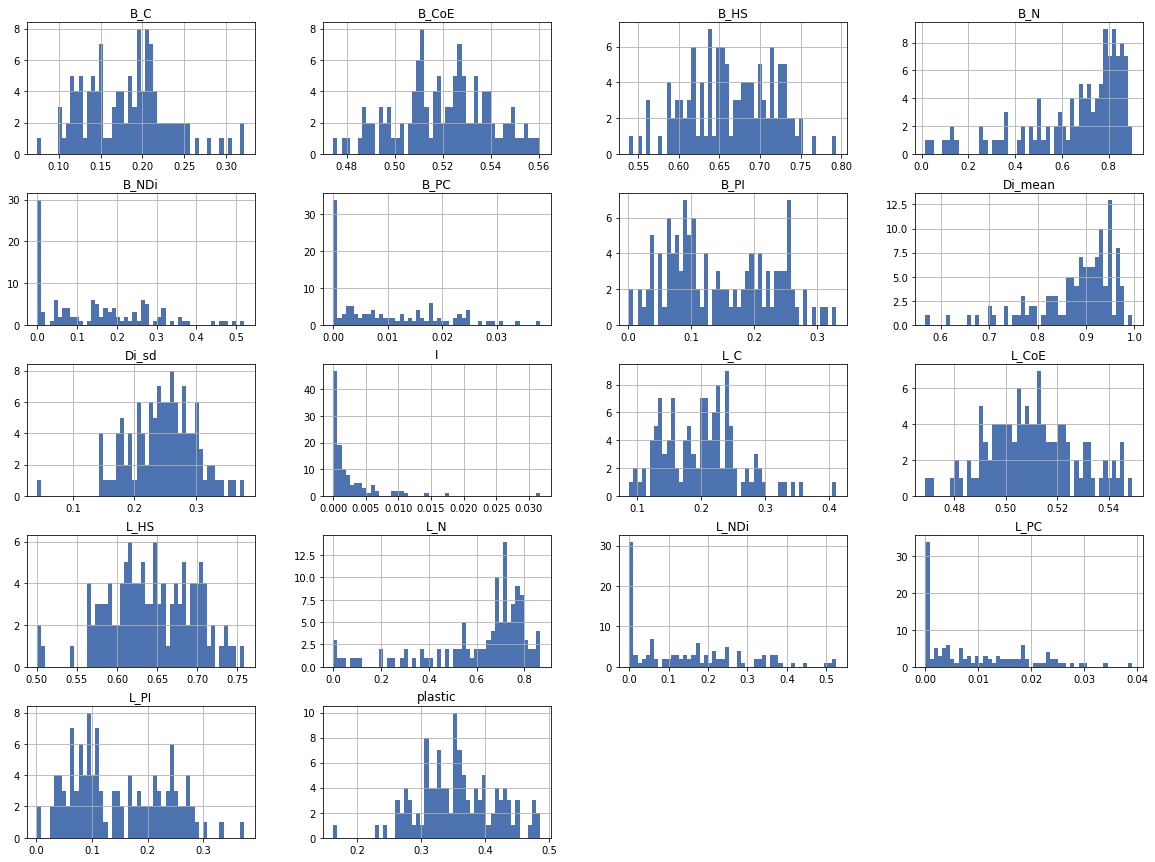

<Figure size 432x288 with 0 Axes>

In [58]:
nums = ['L_C', 'L_PC', 'L_PI', 'L_HS', 'L_CoE', 'B_C', 'B_PC', 'B_PI', 'B_HS', 'B_CoE', 'Di_mean', 'Di_sd', 'plastic', 'L_N', 'L_NDi', 'B_N', 'B_NDi', 'I']

numsData = data[nums]

numsData.hist(bins=50, figsize=(20,15))
plt.show()
plt.savefig("plots/histo_attributs.png")

# Find best SVM parameters for bagging with integrative strategy

In [ ]:
# # find best SVM parameters for bagging with integrative strategy

# loo = LeaveOneOut()

# C=[0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]
# g=[1e-2, 1e-3, 1e-4, 1e-5]

# params = [
#             {'base_estimator__kernel': ['rbf'], 'base_estimator__gamma': g, 
#              'base_estimator__C': C},
#             {'base_estimator__kernel': ['sigmoid'], 'base_estimator__gamma': g,
#              'base_estimator__C': C},
#             {'base_estimator__kernel': ['linear'], 
#              'base_estimator__C': C}
#         ]

# dt = svm.SVC()
# bc = BalancedBaggingClassifier(base_estimator=dt, random_state=1)                   

# scores = ['recall'] 
 

# for score in scores:
#     print("# Tuning hyper-parameters for %s" % score)
#     print()

#     clf = GridSearchCV(estimator=bc, param_grid=params, cv=5,
#                        scoring='%s_macro' % score, n_jobs=15,verbose=1)
    
#     clf.fit(X_train_0, y_train_0)

#     print("Best parameters set found on development set:")
#     print()
#     print(clf.best_params_)
#     print()
#     print("Grid scores on development set:")
#     print()
#     means = clf.cv_results_['mean_test_score']
#     stds = clf.cv_results_['std_test_score']
#     for mean, std, params in zip(means, stds, clf.cv_results_['params']):
#         print("%0.3f (+/-%0.03f) for %r"
#               % (mean, std * 2, params))
#     print()
    


# Find best SVM parameters for CoE with bagging

In [ ]:
# # find best SVM parameters for CoE with bagging


# C=[0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]
# g=[1e-2, 1e-3, 1e-4, 1e-5]

# params = [
#             {'base_estimator__kernel': ['rbf'], 'base_estimator__gamma': g, 
#              'base_estimator__C': C},
#             {'base_estimator__kernel': ['sigmoid'], 'base_estimator__gamma': g,
#              'base_estimator__C': C},
#             {'base_estimator__kernel': ['linear'], 
#              'base_estimator__C': C}
#         ]

# dt = svm.SVC()
# bc = BalancedBaggingClassifier(base_estimator=dt, random_state=1)                   

# scores = ['f1'] 
 

# for score in scores:
#     print("# Tuning hyper-parameters for %s" % score)
#     print()

#     clf = GridSearchCV(estimator=bc, param_grid=params, cv=5,
#                        scoring='%s_macro' % score, n_jobs=15,verbose=1)
    
#     clf.fit(X_train_1, y_train_1)

#     print("Best parameters set found on development set:")
#     print()
#     print(clf.best_params_)
#     print()
#     print("Grid scores on development set:")
#     print()
#     means = clf.cv_results_['mean_test_score']
#     stds = clf.cv_results_['std_test_score']
#     for mean, std, params in zip(means, stds, clf.cv_results_['params']):
#         print("%0.3f (+/-%0.03f) for %r"
#               % (mean, std * 2, params))
#     print()
    


# Tune Random forest parameters

In [4]:



# clfoo = BalancedRandomForestClassifier(max_depth=2, random_state=0,criterion="gini",n_jobs=15)

# param_grid = [
# #     {
# #  'max_depth': [10, 20, 30, 40, 50, None],
# #  'max_features': ['auto', 'sqrt'],
# #  'min_samples_leaf': [1, 2, 4],
# #  'min_samples_split': [2, 5, 10],
# #  'n_estimators': [200, 400, 600, 800, 1000]}
    
# {'n_estimators': [10, 25], 'max_features': [5, 10], 
#  'max_depth': [10, 50, None], 'bootstrap': [True, False]}
# ]

# grid_search_forest = GridSearchCV(clfoo, param_grid, cv=10, scoring='neg_mean_squared_error') # pos pour neg
# grid_search_forest.fit(X_train_0, y_train_0)

# cvres = grid_search_forest.cv_results_

# print("Best parameters set found on development set:")
# print()
# print("best param:", grid_search_forest.best_params_)
# print()
# print("best estimator_:",grid_search_forest.best_estimator_)
# print()
# print("Grid scores on development set:")
# print()

# for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
#     print(np.sqrt(-mean_score), params)

# # clfoo = BalancedRandomForestClassifier(max_depth=2, random_state=0,criterion="gini",n_jobs=15)



Best parameters set found on development set:

best param: {'bootstrap': False, 'max_depth': None, 'max_features': 5, 'n_estimators': 10}

best estimator_: BalancedRandomForestClassifier(bootstrap=False, class_weight=None,
                               criterion='gini', max_depth=None, max_features=5,
                               max_leaf_nodes=None, min_impurity_decrease=0.0,
                               min_samples_leaf=2, min_samples_split=2,
                               min_weight_fraction_leaf=0.0, n_estimators=10,
                               n_jobs=15, oob_score=False, random_state=0,
                               replacement=False, sampling_strategy='auto',
                               verbose=0, warm_start=False)

Grid scores on development set:

1.0331388515223028 {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'n_estimators': 10}
1.021054940485262 {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'n_estimators': 25}
1.032280406129765 {'bootstrap': T

In [ ]:
print("best param:", grid_search_forest.best_params_)
print()
print("best estimator_:",grid_search_forest.best_estimator_)

# ONE CLASS SVM PARAM

In [22]:
# ONE CLASS SVM PARAM


grid = [{'kernel': ['rbf'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'nu': [1e-2, 1e-3, 1e-4, 1e-5]},
                    {'kernel': ['sigmoid'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'nu': [1e-2, 1e-3, 1e-4, 1e-5]},
                    {'kernel': ['linear'], 'nu': [1e-2, 1e-3, 1e-4, 1e-5]}
                   ]

# scores = ['score']
clf = svm.OneClassSVM()


# for score in scores:
for z in ParameterGrid(grid):
    clf.set_params(**z)
    clf.fit(X)

    scores_train_precision = cross_val_score(clf, X_train_2, y_train_2, cv=loo.get_n_splits(X_train_2),scoring='precision')
    scores_train_recall = cross_val_score(clf, X_train_2, y_train_2, cv=loo.get_n_splits(X_train_2),scoring='recall')
    scores_train_accu = cross_val_score(clf, X_train_2, y_train_2, cv=loo.get_n_splits(X_train_2),scoring='accuracy')
    print("\n")
    print(z)
    #print(clf.get_params())
    #print("train:",1-(n_error_train/82)) #nbr genes train
    print("cross_val_preci: %0.2f (+/- %0.2f)" % (scores_train_precision.mean(), scores_train_precision.std() * 2))
    print("cross_val_recall: %0.2f (+/- %0.2f)" % (scores_train_recall.mean(), scores_train_recall.std() * 2))
    print("cross_val_accu: %0.2f (+/- %0.2f)" % (scores_train_accu.mean(), scores_train_accu.std() * 2))
    #print("test:",1-(n_error_test/36))#nbr genes test
#         print("\n")
#         print("test:",classification_report(y_test, y_pred_test))
#         print("\n")
#         print(pd.crosstab(y_test, y_pred_test, rownames=['True'], colnames=['Predicted'], margins=True))
#         print("\n")
#         print("Aire sous la courbe ROC :")
#         print(roc_auc_score(y_test, y_pred_test))
#         print("##############################")




{'gamma': 0.01, 'kernel': 'rbf', 'nu': 0.01}
cross_val_preci: 0.94 (+/- 0.48)
cross_val_recall: 0.94 (+/- 0.48)
cross_val_accu: 0.94 (+/- 0.48)


{'gamma': 0.01, 'kernel': 'rbf', 'nu': 0.001}
cross_val_preci: 0.01 (+/- 0.22)
cross_val_recall: 0.01 (+/- 0.22)
cross_val_accu: 0.01 (+/- 0.22)


{'gamma': 0.01, 'kernel': 'rbf', 'nu': 0.0001}
cross_val_preci: 0.00 (+/- 0.00)
cross_val_recall: 0.00 (+/- 0.00)
cross_val_accu: 0.00 (+/- 0.00)


{'gamma': 0.01, 'kernel': 'rbf', 'nu': 1e-05}
cross_val_preci: 0.00 (+/- 0.00)
cross_val_recall: 0.00 (+/- 0.00)
cross_val_accu: 0.00 (+/- 0.00)


{'gamma': 0.001, 'kernel': 'rbf', 'nu': 0.01}
cross_val_preci: 0.01 (+/- 0.22)
cross_val_recall: 0.01 (+/- 0.22)
cross_val_accu: 0.01 (+/- 0.22)


{'gamma': 0.001, 'kernel': 'rbf', 'nu': 0.001}
cross_val_preci: 0.00 (+/- 0.00)
cross_val_recall: 0.00 (+/- 0.00)
cross_val_accu: 0.00 (+/- 0.00)


{'gamma': 0.001, 'kernel': 'rbf', 'nu': 0.0001}
cross_val_preci: 0.00 (+/- 0.00)
cross_val_recall: 0.00 (+/- 0.00)


# Model training with best parameters for each model 

In [31]:
# train model with best parameters for SVM with BalancedBaggingClassifier

my_svm = BalancedBaggingClassifier(base_estimator=svm.SVC(C=10, kernel="linear", probability=True,class_weight={0:1,1:1})
                                ,replacement = False,
                                random_state=1654)


my_svm.fit(X_train_0, y_train_0)

print('########## Results Intgrative strategy (SVM) ##########')
train_predictions_my_svm = my_svm.predict(X_test_0)
acc = recall_score(y_test_0, train_predictions_my_svm)
acc2 = precision_score(y_test_0, train_predictions_my_svm)
recall_my_svm = cross_val_score(my_svm, X_train_0, y_train_0, cv=30, scoring='recall')
preci_my_svm = cross_val_score(my_svm, X_train_0, y_train_0, cv=30, scoring='precision')
f1_my_svm = cross_val_score(my_svm, X_train_0, y_train_0, cv=30, scoring='f1')
print("test recall: {:.2%}".format(acc))
print("test precision: {:.2%}".format(acc2))
print()
print("train recall cross_val: {:.2%}".format(np.mean(recall_my_svm)))
print("train preci cross_val: {:.2%}".format(np.mean(preci_my_svm)))
print("train f1 cross_val: {:.2%}".format(np.mean(f1_my_svm)))


ll = log_loss(y_test_0, train_predictions_my_svm)
print("Log Loss: {:.5}".format(ll))
print()

# train model for random forest

# rf = BalancedBaggingClassifier(base_estimator=RandomForestClassifier(random_state=957,criterion="gini", bootstrap=True,max_depth=10,max_features=5,n_estimators=25)
#                                 ,replacement = False,
#                                 random_state=0)

# {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'n_estimators': 25}
rf = BalancedRandomForestClassifier()


rf.fit(X_train_0, y_train_0)

print('########## Results Integrative strategy (RandomForest) ##########')
train_predictions_rf = rf.predict(X_test_0)
acc = recall_score(y_test_0, train_predictions_rf)
acc2 = precision_score(y_test_0, train_predictions_rf)
# recall_rf = cross_val_score(rf, X_test_0, train_predictions_rf, cv=15, scoring='recall')
recall_rf = cross_val_score(rf, X_train_0, y_train_0, cv=30, scoring='recall')
preci_rf = cross_val_score(rf, X_train_0, y_train_0, cv=30, scoring='precision')
f1_rf = cross_val_score(rf, X_train_0, y_train_0, cv=30, scoring='f1')
print("test recall: {:.2%}".format(acc))
print("test precision: {:.2%}".format(acc2))
print()
print("train recall cross_val: {:.2%}".format(np.mean(recall_rf)))
print("train preci cross_val: {:.2%}".format(np.mean(preci_rf)))
print("train f1 cross_val: {:.2%}".format(np.mean(f1_rf)))
print()
ll = log_loss(y_test_0, train_predictions_rf)
print("Log Loss: {:.5}".format(ll))
print()


# train model for naive bayes

nb = BalancedBaggingClassifier(base_estimator=GaussianNB()
                                ,replacement = False,
                                random_state=14)
nb.fit(X_train_0, y_train_0)

print('########## Results Intgrative strategy (Naive Bayes) ##########')
train_predictions_nb = nb.predict(X_test_0)
acc = recall_score(y_test_0, train_predictions_nb)
acc2 = precision_score(y_test_0, train_predictions_nb)
recall_nb = cross_val_score(nb, X_train_0, y_train_0, cv=30, scoring='recall')
preci_nb = cross_val_score(nb, X_train_0, y_train_0, cv=30, scoring='precision')
f1_nb = cross_val_score(nb, X_train_0, y_train_0, cv=30, scoring='f1')

print("test recall: {:.2%}".format(acc))
print("test precision: {:.2%}".format(acc2))
print()
print("train recall cross_val: {:.2%}".format(np.mean(recall_nb)))
print("train preci cross_val: {:.2%}".format(np.mean(preci_nb)))
print("train f1 cross_val: {:.2%}".format(np.mean(f1_nb)))
print()
ll = log_loss(y_test_0, train_predictions_nb)
print("Log Loss: {:.5}".format(ll))
print()



# train model with best parameters for SVM with BalancedBaggingClassifier (COE ONLY)

my_svm_coe = BalancedBaggingClassifier(base_estimator=svm.SVC(C=10, kernel="linear", probability=True,class_weight={0:1,1:1}),
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=0)

my_svm_coe.fit(X_train_1, y_train_1)


print('########## Results CoE ##########')

train_predictions_coe = my_svm_coe.predict(X_test_1)
acc = recall_score(y_test_1, train_predictions_coe)
acc2 = precision_score(y_test_1, train_predictions_coe)
recall_coe = cross_val_score(my_svm_coe, X_train_1, y_train_1, cv=30, scoring='recall')
preci_coe = cross_val_score(my_svm_coe, X_train_1, y_train_1, cv=30, scoring='precision')
f1_coe = cross_val_score(my_svm_coe, X_train_1, y_train_1, cv=30, scoring='f1')

print("test recall: {:.2%}".format(acc))
print("test precision: {:.2%}".format(acc2))
print()
print("train recall cross_val: {:.2%}".format(np.mean(recall_coe)))
print("train preci cross_val: {:.2%}".format(np.mean(preci_coe)))
print("train f1 cross_val: {:.2%}".format(np.mean(f1_coe)))
print()
ll = log_loss(y_test_1, train_predictions_coe)
print("Log Loss: {:.5}".format(ll))
print()


# train model with best parameters for ONE CLASS SVM

svm_oc = svm.OneClassSVM(kernel="linear",nu=0.01)

svm_oc.fit(X_train_2, y_train_2)


print('########## Results OneClass SVM ##########')

train_predictions_oc = svm_oc.predict(X_test_0)
acc = recall_score(y_test_0, train_predictions_oc)
acc2 = precision_score(y_test_0, train_predictions_oc)
recall_oc = cross_val_score(svm_oc, X_train_2, y_train_2, cv=loo.get_n_splits(X_train_2), scoring='recall')
preci_oc = cross_val_score(svm_oc, X_train_2, y_train_2, cv=loo.get_n_splits(X_train_2), scoring='precision')
f1_oc = cross_val_score(svm_oc, X_train_2, y_train_2, cv=loo.get_n_splits(X_train_2), scoring='f1')

print("test recall: {:.2%}".format(acc))
print("test precision: {:.2%}".format(acc2))
print()
print("recall cross_val train: {:.2%}".format(np.mean(recall_oc)))
print("preci cross_val train: {:.2%}".format(np.mean(preci_oc)))
print("train f1 cross_val: {:.2%}".format(np.mean(f1_oc)))
print()
ll = log_loss(y_test_1, train_predictions_oc)
print("Log Loss: {:.5}".format(ll))
print()


########## Results Intgrative strategy (SVM) ##########
test recall: 57.50%
test precision: 9.47%

train recall cross_val: 61.67%
train preci cross_val: 8.63%
train f1 cross_val: 15.04%
Log Loss: 8.4652

########## Results Integrative strategy (RandomForest) ##########
test recall: 70.00%
test precision: 10.49%

train recall cross_val: 78.33%
train preci cross_val: 10.32%
train f1 cross_val: 18.30%

Log Loss: 8.9653

########## Results Intgrative strategy (Naive Bayes) ##########
test recall: 52.50%
test precision: 8.86%

train recall cross_val: 65.00%
train preci cross_val: 9.62%
train f1 cross_val: 16.63%

Log Loss: 8.3938

########## Results CoE ##########
test recall: 66.67%
test precision: 2.84%

train recall cross_val: 49.44%
train preci cross_val: 3.20%
train f1 cross_val: 5.73%

Log Loss: 27.289

########## Results OneClass SVM ##########
test recall: 97.50%
test precision: 4.30%

recall cross_val train: 97.56%
preci cross_val train: 97.56%
train f1 cross_val: 97.56%

Log Loss:

# Classification reports and confusion matrix

In [21]:
print("Detailed classification report for integrative strategy (SVM):")
print()
print()
y_true, y_pred = y_test_0, my_svm.predict(X_test_0)

print(pd.crosstab(y_true, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))
print("\n")
print(classification_report(y_true, y_pred))


print()
print()
print("Detailed classification report for integrative strategy (Random forest):")
print()
y_true_rf, y_pred_rf = y_test_0, rf.predict(X_test_0)

print(pd.crosstab(y_true_rf, y_pred_rf, rownames=['True'], colnames=['Predicted'], margins=True))
print("\n")
train_predictions_my_svm = my_svm.predict(X_test_0)
print(classification_report(y_true_rf, y_pred_rf))


print()
print()
print("Detailed classification report for integrative strategy (Naive Bayes):")
print()
y_true_nb, y_pred_nb = y_test_0, nb.predict(X_test_0)

print(pd.crosstab(y_true_nb, y_pred_nb, rownames=['True'], colnames=['Predicted'], margins=True))
print("\n")
print(classification_report(y_true_nb, y_pred_nb))

print()
print()
print("Detailed classification report for CoE Only:")
print()
# print("The model is trained on the full development set.")
# print("The scores are computed on the full evaluation set.")
print()
y_true_coe, y_pred_coe = y_test_1, my_svm_coe.predict(X_test_1)

print(pd.crosstab(y_true_coe, y_pred_coe, rownames=['True'], colnames=['Predicted'], margins=True))
print("\n")
print(classification_report(y_true_coe, y_pred_coe))

print()
print()
print("Detailed classification report for SVM One class:")
print()
# print("The model is trained on the full development set.")
# print("The scores are computed on the full evaluation set.")
print()
y_true_oc, y_pred_oc = y_test_0, svm_oc.predict(X_test_0)

print(pd.crosstab(y_true_oc, y_pred_oc, rownames=['True'], colnames=['Predicted'], margins=True))
print("\n")
print(classification_report(y_true_oc, y_pred_oc))




Detailed classification report for integrative strategy (SVM):


Predicted   -1    1  All
True                    
-1         701  224  925
1           18   24   42
All        719  248  967


              precision    recall  f1-score   support

          -1       0.97      0.76      0.85       925
           1       0.10      0.57      0.17        42

    accuracy                           0.75       967
   macro avg       0.54      0.66      0.51       967
weighted avg       0.94      0.75      0.82       967



Detailed classification report for integrative strategy (Random forest):

Predicted   -1    1  All
True                    
-1         679  246  925
1           10   32   42
All        689  278  967


              precision    recall  f1-score   support

          -1       0.99      0.73      0.84       925
           1       0.12      0.76      0.20        42

    accuracy                           0.74       967
   macro avg       0.55      0.75      0.52       967
weight

Aire sous la courbe (AUC) SVM :  0.7281823085221144
Aire sous la courbe (AUC) RF :  0.7945658036677453


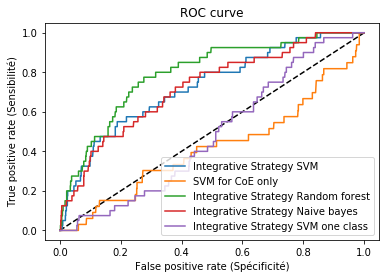

In [25]:
# Roc Curve for the model

y_pred_proba=my_svm.predict_proba(X_test_0)

probas_ = my_svm.predict_proba(X_test_0)
svm_probas_coe_ = my_svm_coe.predict_proba(X_test_1)
rf_probas_= rf.predict_proba(X_test_0)
nb_probas_= nb.predict_proba(X_test_0)
svm_oc_probas_ = svm_oc.predict_proba(X_test_0)

   

fpr, tpr, thresholds = roc_curve(y_test_0, probas_[:, 1])
fpr_coe, tpr_coe, thresholds_coe = roc_curve(y_test_1, svm_probas_coe_[:, 1])
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test_0, rf_probas_[:, 1])
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test_0, nb_probas_[:, 1])
fpr_oc, tpr_oc, thresholds_oc = roc_curve(y_test_0, svm_oc_probas_[:, 1])


print("Aire sous la courbe (AUC) SVM : ", auc(fpr, tpr))

print("Aire sous la courbe (AUC) RF : ", auc(fpr_rf, tpr_rf))

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Integrative Strategy SVM')
plt.plot(fpr_coe, tpr_coe, label='SVM for CoE only')
plt.plot(fpr_rf, tpr_rf, label='Integrative Strategy Random forest')
plt.plot(fpr_nb, tpr_nb, label='Integrative Strategy Naive bayes')
plt.plot(fpr_oc, tpr_oc, label='Integrative Strategy SVM one class')
plt.plot()

plt.xlabel('False positive rate (Spécificité)')
plt.ylabel('True positive rate (Sensibilité)')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()



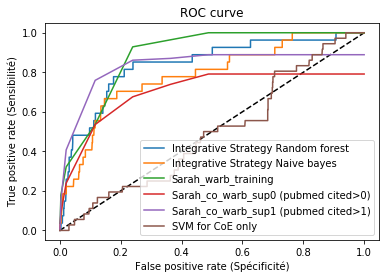

Aire sous la courbe (AUC) SVM:  0.7663711583924349
Aire sous la courbe (AUC) RF:  0.8392237982663515
Aire sous la courbe (AUC) NB:  0.7856382978723404



In [11]:
# All Roc curves based on Sarah data & 

fpr_s=[1,
0.488485075,
0.3639463727,
0.2395478115,
0.1162703788,
0.02097444761,
0.003550240576,
0.00182183398,
0.0003737095343]

tpr_s_war_train=[
1,
1,
0.9642857143,
0.9285714286,
0.5357142857,
0.3214285714,
0.1785714286,
0.07142857143,
0.03571428571]

tpr_s_cocited_warb_0=[
0.7912087912
,0.7912087912
,0.739010989
,0.6758241758
,0.5357142857
,0.239010989
,0.08791208791
,0.04120879121
,0.008241758242
    ]

tpr_s_cocited_warb_1=[
0.8888888889
,0.8888888889
,0.8703703704
,0.8611111111
,0.7592592593
,0.4074074074
,0.1481481481
,0.05555555556
,0
    ]
tpr_s_gwide=[
1,0.5019386182
,0.3765123558
,0.2510393796
,0.1253795487
,0.0250385388
,0.005045078713
,0.002522539356
,0.0005138506096 ]

tpr_s_linked_ox_gly=[
1,1
,0.7501163332
,0.5001395998
,0.2497906003
,0.04988366682
,0.0100511866
,0.005025593299
,0.001023731968
]

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')


# plt.plot(fpr, tpr, label='Integrative Strategy SVM')
plt.plot(fpr_rf, tpr_rf, label='Integrative Strategy Random forest')
plt.plot(fpr_nb, tpr_nb, label='Integrative Strategy Naive bayes')
plt.plot(fpr_s,tpr_s_war_train,label="Sarah_warb_training")
plt.plot(fpr_s,tpr_s_cocited_warb_0,label="Sarah_co_warb_sup0 (pubmed cited>0)")
plt.plot(fpr_s,tpr_s_cocited_warb_1,label="Sarah_co_warb_sup1 (pubmed cited>1)")
# plt.plot(fpr_s,tpr_s_gwide,label="Sarah_gwide")
# plt.plot(fpr_s,tpr_s_linked_ox_gly,label="Sarah_linked_ox/gly")
plt.plot(fpr_coe, tpr_coe, label='SVM for CoE only')

plt.plot()

plt.xlabel('False positive rate (Spécificité)')
plt.ylabel('True positive rate (Sensibilité)')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
# print("Aire sous la courbe ROC : ", roc_auc_score(y_true, y_pred))
print("Aire sous la courbe (AUC) SVM: ", auc(fpr, tpr))
print("Aire sous la courbe (AUC) RF: ", auc(fpr_rf, tpr_rf))
print("Aire sous la courbe (AUC) NB: ", auc(fpr_nb, tpr_nb))
print()


# # Check for best ratio of the curves

# print("########## SVM ##########")
# for j in range(4,100):
#     print("point", j)
#     print("\ttpr_svm %0.f %%"  % (tpr[j]*100))
#     print("\tfpr_svm %0.f %%"  % (fpr[j]*100))
#     print()

# print("########## Sarah_warb_training ##########")
# for j in range(4,8):
#     print("point", j)
#     print("\ttpr %0.f %%"  % (tpr_s_war_train[j]*100))
#     print("\tfpr %0.f %%"  % (fpr_s[j]*100))
#     print()

# print("########## Sarah_co_warb_sup1 (pubmed cited>1) ##########")
# for j in range(4,8):
#     print("point", j)
#     print("\ttpr %0.f %%"  % (tpr_s_cocited_warb_1[j]*100))
#     print("\tfpr %0.f %%"  % (fpr_s[j]*100))
#     print()


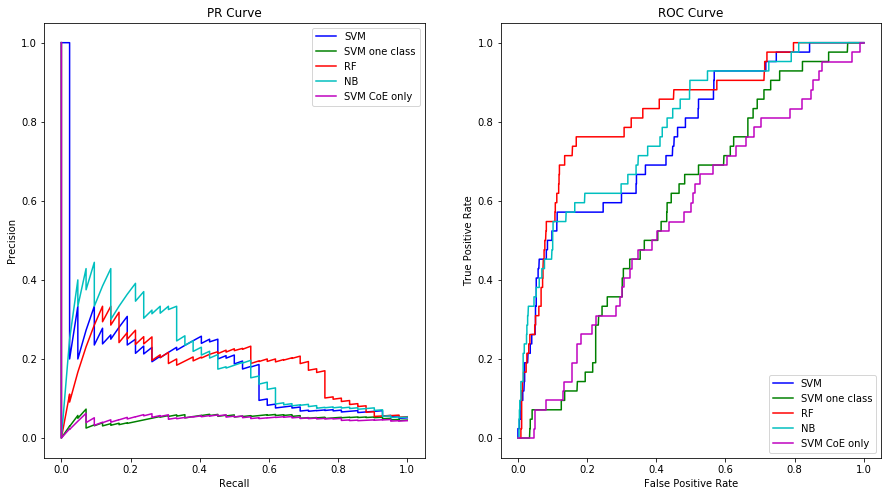

<Figure size 432x288 with 0 Axes>

In [54]:
# precision/recall curve & ROC curve 

fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(1,2,1)
ax1.set_xlim([-0.05,1.05])
ax1.set_ylim([-0.05,1.05])
ax1.set_xlabel('Recall')
ax1.set_ylabel('Precision')
ax1.set_title('PR Curve')

ax2 = fig.add_subplot(1,2,2)
ax2.set_xlim([-0.05,1.05])
ax2.set_ylim([-0.05,1.05])
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve')

models=[my_svm,svm_oc,rf,nb,my_svm_coe]

models_name=["SVM","SVM one class","RF","NB", "SVM CoE only"]

for w,k,n in zip(models,'bgrcmykw',models_name):
    if (w==svm_oc):
        
        w.fit(X_train_2,y_train_2)
        pred_prob_2 = w.decision_function(X_test_0)

        p,r,_ = precision_recall_curve(y_test_0,pred_prob_2)
        tpr,fpr,_ = roc_curve(y_test_0,pred_prob_2)

        ax1.plot(r,p,c=k,label=n)
        ax2.plot(tpr,fpr,c=k,label=n)
        
    elif (w==my_svm_coe):
        w.fit(X_train_1,y_train_1)
        pred_prob_1 = w.predict_proba(X_test_1)[:,1]

        p,r,_ = precision_recall_curve(y_test_0,pred_prob_1)
        tpr,fpr,_ = roc_curve(y_test_0,pred_prob_1)

        ax1.plot(r,p,c=k,label=n)
        ax2.plot(tpr,fpr,c=k,label=n)
    else:
        w.fit(X_train_0,y_train_0)
        pred_prob_0 = w.predict_proba(X_test_0)[:,1]

        p,r,_ = precision_recall_curve(y_test_0,pred_prob_0)
        tpr,fpr,_ = roc_curve(y_test_0,pred_prob_0)

        ax1.plot(r,p,c=k,label=n)
        ax2.plot(tpr,fpr,c=k,label=n)
ax1.legend(loc='upper right')    
ax2.legend(loc='lower right')

plt.show()
plt.savefig("plots/1_Precision_and_Roc_Curve.png")

In [ ]:
# roc curve with leave one out cross validation to make sure there is no big variability

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
cv = StratifiedKFold(n_splits=20)


i = 0
for train, test in loo.split(X_train_0, y_train_0):
    probas_ = rf.fit(X_train_0, y_train_0).predict_proba(X_test_0)
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_test_0, probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3)
#              label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc)) # (si loo, mettre en commentaire)

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)
# plt.plot(fpr_s,tpr_s_war_train,label="Sarah_warb_training")
# plt.plot(fpr_s,tpr_s_cocited_warb_0,label="Sarah_co_warb_sup0 (pubmed cited>0)")
# plt.plot(fpr_s,tpr_s_cocited_warb_1,label="Sarah_co_warb_sup1 (pubmed cited>1)")

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')


plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc='lower left', bbox_to_anchor=(1, 0.5))
plt.show()


AxesSubplot(0.125,0.125;0.775x0.755)


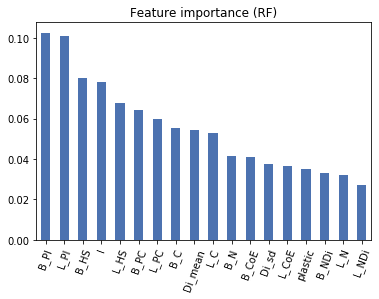

In [36]:
print(pd.Series(rf.feature_importances_, index=X.columns).nlargest(18).plot(kind='bar',rot=70,title= "Feature importance (RF)"))

plt.savefig("plots/feature importance RF")

# from sklearn import tree
# print(rf.decision_path(X_test_0))
# rf_coef=[]
# rf_coef=np.append(rf_coef, (np.mean([est.steps[1][1].feature_importances_ for est in rf.estimators_], axis=0)))

# print(pd.Series(abs(rf_coef), index=X_train_0.columns).nlargest(18).plot(kind='bar',rot=70,title="Feature importance Random Forest"))

In [50]:
from sklearn.tree import _tree

n_nodes = rf.tree_.node_count
children_left = rf.tree_.children_left
children_right = rf.tree_.children_right
feature = rf.tree_.feature
threshold = rf.tree_.threshold


# The tree structure can be traversed to compute various properties such
# as the depth of each node and whether or not it is a leaf.
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, -1)]  # seed is the root node id and its parent depth
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1

    # If we have a test node
    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True

print("The binary tree structure has %s nodes and has "
      "the following tree structure:"
      % n_nodes)
for i in range(n_nodes):
    if is_leaves[i]:
        print("%snode=%s leaf node." % (node_depth[i] * "\t", i))
    else:
        print("%snode=%s test node: go to node %s if X[:, %s] <= %s else to "
              "node %s."
              % (node_depth[i] * "\t",
                 i,
                 children_left[i],
                 feature[i],
                 threshold[i],
                 children_right[i],
                 ))
print()

# First let's retrieve the decision path of each sample. The decision_path
# method allows to retrieve the node indicator functions. A non zero element of
# indicator matrix at the position (i, j) indicates that the sample i goes
# through the node j.

node_indicator = estimator.decision_path(X_test)

# Similarly, we can also have the leaves ids reached by each sample.

leave_id = estimator.apply(X_test)

# Now, it's possible to get the tests that were used to predict a sample or
# a group of samples. First, let's make it for the sample.

sample_id = 0
node_index = node_indicator.indices[node_indicator.indptr[sample_id]:
                                    node_indicator.indptr[sample_id + 1]]

print('Rules used to predict sample %s: ' % sample_id)
for node_id in node_index:
    if leave_id[sample_id] == node_id:
        continue

    if (X_test[sample_id, feature[node_id]] <= threshold[node_id]):
        threshold_sign = "<="
    else:
        threshold_sign = ">"

    print("decision id node %s : (X_test[%s, %s] (= %s) %s %s)"
          % (node_id,
             sample_id,
             feature[node_id],
             X_test[sample_id, feature[node_id]],
             threshold_sign,
             threshold[node_id]))

# For a group of samples, we have the following common node.
sample_ids = [0, 1]
common_nodes = (node_indicator.toarray()[sample_ids].sum(axis=0) ==
                len(sample_ids))

common_node_id = np.arange(n_nodes)[common_nodes]

print("\nThe following samples %s share the node %s in the tree"
      % (sample_ids, common_node_id))
print("It is %s %% of all nodes." % (100 * len(common_node_id) / n_nodes,))

AttributeError: 'BalancedRandomForestClassifier' object has no attribute 'tree_'

AxesSubplot(0.125,0.125;0.775x0.755)


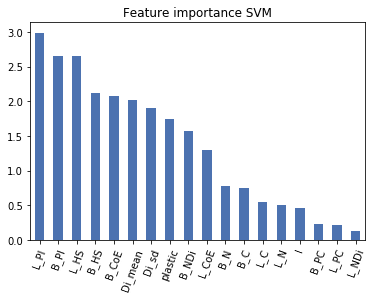

In [37]:
svm_coef=[]
svm_coef=np.append(svm_coef, (np.mean([est.steps[1][1].coef_ for est in my_svm.estimators_], axis=0)))

print(pd.Series(abs(svm_coef), index=X_train_0.columns).nlargest(18).plot(kind='bar',rot=70,title="Feature importance SVM"))
plt.savefig("plots/feature importance SVM")

AxesSubplot(0.125,0.125;0.775x0.755)


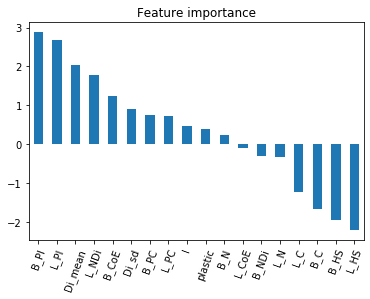

In [15]:
print(pd.Series((svm_coef), index=X_train_0.columns).nlargest(18).plot(kind='bar',rot=70,title="Feature importance"))

NameError: name 'fpr_rf' is not defined

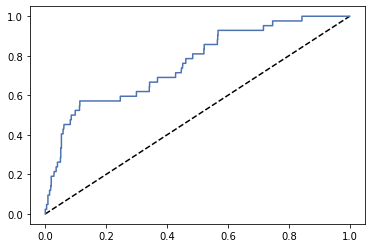

In [33]:
svm_probas_coe = my_svm_coe.predict_proba(X_test_1)
probas_ = my_svm.predict_proba(X_test_0)
rf_probas_= rf.predict_proba(X_test_0)
nb_probas_= nb.predict_proba(X_test_0)
   

fpr, tpr, thresholds = roc_curve(y_test_0, probas_[:, 1])
fpr_coe, tpr_coe, thresholds_coe = roc_curve(y_test_1, svm_probas_coe[:, 1])


plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')


plt.plot(fpr, tpr, label='Integrative Strategy SVM')
plt.plot(fpr_rf, tpr_rf, label='Integrative Strategy RF')
plt.plot(fpr_s,tpr_s_war_train,label="Sarah_warb_training")
# plt.plot(fpr_s,tpr_s_cocited_warb_0,label="Sarah_co_warb_sup0 (pubmed cited>0)")
plt.plot(fpr_s,tpr_s_cocited_warb_1,label="Sarah_co_warb_sup1 (pubmed cited>1)")
# plt.plot(fpr_s,tpr_s_gwide,label="Sarah_gwide")
# plt.plot(fpr_s,tpr_s_linked_ox_gly,label="Sarah_linked_ox/gly")
plt.plot(fpr_coe, tpr_coe, label='SVM for CoE only')

plt.plot()

plt.xlabel('False positive rate (Spécificité)')
plt.ylabel('True positive rate (Sensibilité)')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
plt.savefig("plots/Comparaison_etude_precedente")


# print("Aire sous la courbe ROC SVM: ", roc_auc_score(y_test_0, svm_probas_[:, 1]))
print("Aire sous la courbe (AUC) SVM : ", auc(fpr, tpr))
print()

print(pd.crosstab(y_true, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))
print("\n")

# print("Aire sous la courbe ROC RF: ", roc_auc_score(y_test_0, rf_probas_[:, 1]))
print("Aire sous la courbe (AUC) RF : ", auc(fpr_rf, tpr_rf))
print()

print(pd.crosstab(y_true_rf, y_pred_rf, rownames=['True'], colnames=['Predicted'], margins=True))
print("\n")

# print("Aire sous la courbe ROC NB: ", roc_auc_score(y_test_0, rf_probas_[:, 1]))
print("Aire sous la courbe (AUC) NB : ", auc(fpr_nb, tpr_nb))
print()

print(pd.crosstab(y_true_nb, y_pred_nb, rownames=['True'], colnames=['Predicted'], margins=True))
print("\n")

# print(sorted(rf_probas_[:, 1],reverse=True))

In [10]:
# train model with best parameters for SVM with BalancedBaggingClassifier

my_svm = BalancedBaggingClassifier(base_estimator=svm.SVC(C=10, kernel="linear", probability=True,class_weight={0:1,1:1})
                                ,replacement = False,
                                random_state=1654)


my_svm.fit(X_train_0, y_train_0)

print('########## Results Intgrative strategy (SVM) ##########')
train_predictions_my_svm = my_svm.predict(X_test_0)

recall_svm_test = recall_score(y_test_0, train_predictions_my_svm)
preci_svm_test = precision_score(y_test_0, train_predictions_my_svm)
f1_svm_test = f1_score(y_test_0, train_predictions_my_svm)

recall_my_svm = cross_val_score(my_svm, X_train_0, y_train_0, cv=30, scoring='recall')
preci_my_svm = cross_val_score(my_svm, X_train_0, y_train_0, cv=30, scoring='precision')
f1_my_svm = cross_val_score(my_svm, X_train_0, y_train_0, cv=30, scoring='f1')

print("test recall: {:.2%}".format(recall_svm_test))
print("test precision: {:.2%}".format(preci_svm_test))
print("test f1: {:.2%}".format(f1_svm_test))
print()
print("train recall cross_val: {:.2%}".format(np.mean(recall_my_svm)))
print("train preci cross_val: {:.2%}".format(np.mean(preci_my_svm)))
print("train f1 cross_val: {:.2%}".format(np.mean(f1_my_svm)))


ll = log_loss(y_test_0, train_predictions_my_svm)
print("Log Loss: {:.5}".format(ll))
print()

# train model for random forest

# rf = BalancedBaggingClassifier(base_estimator=RandomForestClassifier(random_state=957,criterion="gini", bootstrap=True,max_depth=10,max_features=5,n_estimators=25)
#                                 ,replacement = False,
#                                 random_state=0)

# {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'n_estimators': 25}
rf = BalancedRandomForestClassifier()


rf.fit(X_train_0, y_train_0)

print('########## Results Integrative strategy (RandomForest) ##########')
train_predictions_rf = rf.predict(X_test_0)

recall_rf_test = recall_score(y_test_0, train_predictions_rf)
preci_rf_test = precision_score(y_test_0, train_predictions_rf)
f1_rf_test = f1_score(y_test_0, train_predictions_rf)

recall_rf = cross_val_score(rf, X_train_0, y_train_0, cv=30, scoring='recall')
preci_rf = cross_val_score(rf, X_train_0, y_train_0, cv=30, scoring='precision')
f1_rf = cross_val_score(rf, X_train_0, y_train_0, cv=30, scoring='f1')

print("test recall: {:.2%}".format(recall_rf_test))
print("test precision: {:.2%}".format(preci_rf_test))
print("test f1: {:.2%}".format(f1_rf_test))
print()
print("train recall cross_val: {:.2%}".format(np.mean(recall_rf)))
print("train preci cross_val: {:.2%}".format(np.mean(preci_rf)))
print("train f1 cross_val: {:.2%}".format(np.mean(f1_rf)))
print()
ll = log_loss(y_test_0, train_predictions_rf)
print("Log Loss: {:.5}".format(ll))
print()


# train model for naive bayes

nb = BalancedBaggingClassifier(base_estimator=GaussianNB()
                                ,replacement = False,
                                random_state=14)
nb.fit(X_train_0, y_train_0)

print('########## Results Intgrative strategy (Naive Bayes) ##########')
train_predictions_nb = nb.predict(X_test_0)

recall_nb_test = recall_score(y_test_0, train_predictions_nb)
preci_nb_test = precision_score(y_test_0, train_predictions_nb)
f1_nb_test = f1_score(y_test_0, train_predictions_nb)

recall_nb = cross_val_score(nb, X_train_0, y_train_0, cv=30, scoring='recall')
preci_nb = cross_val_score(nb, X_train_0, y_train_0, cv=30, scoring='precision')
f1_nb = cross_val_score(nb, X_train_0, y_train_0, cv=30, scoring='f1')

print("test recall: {:.2%}".format(recall_nb_test))
print("test precision: {:.2%}".format(preci_nb_test))
print("test f1: {:.2%}".format(f1_nb_test))
print()
print("train recall cross_val: {:.2%}".format(np.mean(recall_nb)))
print("train preci cross_val: {:.2%}".format(np.mean(preci_nb)))
print("train f1 cross_val: {:.2%}".format(np.mean(f1_nb)))
print()
ll = log_loss(y_test_0, train_predictions_nb)
print("Log Loss: {:.5}".format(ll))
print()



# train model with best parameters for SVM with BalancedBaggingClassifier (COE ONLY)

my_svm_coe = BalancedBaggingClassifier(base_estimator=svm.SVC(C=10, kernel="linear", probability=True,class_weight={0:1,1:1}),
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=0)

my_svm_coe.fit(X_train_1, y_train_1)


print('########## Results CoE ##########')

train_predictions_coe = my_svm_coe.predict(X_test_1)

recall_coe_test = recall_score(y_test_1, train_predictions_coe)
preci_coe_test = precision_score(y_test_1, train_predictions_coe)
f1_coe_test = f1_score(y_test_1, train_predictions_coe)

recall_coe = cross_val_score(my_svm_coe, X_train_1, y_train_1, cv=30, scoring='recall')
preci_coe = cross_val_score(my_svm_coe, X_train_1, y_train_1, cv=30, scoring='precision')
f1_coe = cross_val_score(my_svm_coe, X_train_1, y_train_1, cv=30, scoring='f1')

print("test recall: {:.2%}".format(recall_coe_test))
print("test precision: {:.2%}".format(preci_coe_test))
print("test f1: {:.2%}".format(f1_coe_test))
print()
print("train recall cross_val: {:.2%}".format(np.mean(recall_coe)))
print("train preci cross_val: {:.2%}".format(np.mean(preci_coe)))
print("train f1 cross_val: {:.2%}".format(np.mean(f1_coe)))
print()
ll = log_loss(y_test_1, train_predictions_coe)
print("Log Loss: {:.5}".format(ll))
print()


# train model with best parameters for ONE CLASS SVM

svm_oc = svm.OneClassSVM(kernel="linear",nu=0.01)

svm_oc.fit(X_train_2, y_train_2)


print('########## Results OneClass SVM ##########')

train_predictions_oc = svm_oc.predict(X_test_0)

recall_svm_oc_test = recall_score(y_test_0, train_predictions_oc)
preci_svm_oc_test = precision_score(y_test_0, train_predictions_oc)
f1_svm_oc_test = f1_score(y_test_0, train_predictions_oc)


recall_oc = cross_val_score(svm_oc, X_train_2, y_train_2, cv=loo.get_n_splits(X_train_2), scoring='recall')
preci_oc = cross_val_score(svm_oc, X_train_2, y_train_2, cv=loo.get_n_splits(X_train_2), scoring='precision')
f1_oc = cross_val_score(svm_oc, X_train_2, y_train_2, cv=loo.get_n_splits(X_train_2), scoring='f1')

print("test recall: {:.2%}".format(recall_svm_oc_test))
print("test precision: {:.2%}".format(preci_svm_oc_test))
print("test f1: {:.2%}".format(f1_svm_oc_test))
print()
print("recall cross_val train: {:.2%}".format(np.mean(recall_oc)))
print("preci cross_val train: {:.2%}".format(np.mean(preci_oc)))
print("train f1 cross_val: {:.2%}".format(np.mean(f1_oc)))
print()
ll = log_loss(y_test_1, train_predictions_oc)
print("Log Loss: {:.5}".format(ll))
print()


########## Results Intgrative strategy (SVM) ##########
test recall: 57.14%
test precision: 9.68%
test f1: 16.55%

train recall cross_val: 65.00%
train preci cross_val: 8.86%
train f1 cross_val: 15.48%
Log Loss: 8.6438

########## Results Integrative strategy (RandomForest) ##########
test recall: 76.19%
test precision: 11.51%
test f1: 20.00%

train recall cross_val: 79.44%
train preci cross_val: 9.34%
train f1 cross_val: 16.73%

Log Loss: 9.1439

########## Results Intgrative strategy (Naive Bayes) ##########
test recall: 61.90%
test precision: 12.26%
test f1: 20.47%

train recall cross_val: 59.44%
train preci cross_val: 9.09%
train f1 cross_val: 15.56%

Log Loss: 7.2151

########## Results CoE ##########
test recall: 71.43%
test precision: 3.27%
test f1: 6.25%

train recall cross_val: 37.22%
train preci cross_val: 2.82%
train f1 cross_val: 5.07%

Log Loss: 26.789

########## Results OneClass SVM ##########
test recall: 95.24%
test precision: 4.91%
test f1: 9.35%

recall cross_val tra

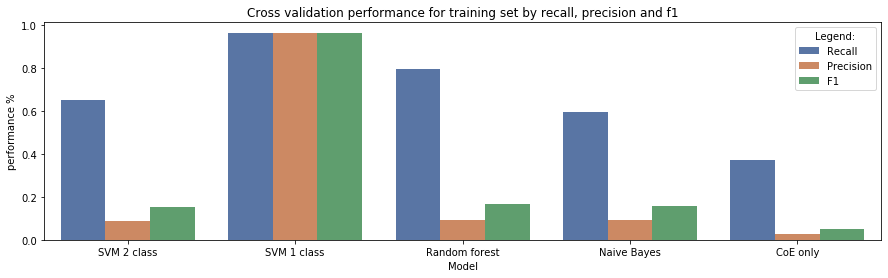

<Figure size 432x288 with 0 Axes>

In [56]:
x = [
    "SVM 2 class",
    "SVM 1 class",
    "Random forest",
    "Naive Bayes",
    "CoE only"
]
y = [np.mean(recall_my_svm),
     np.mean(recall_oc), 
     np.mean(recall_rf), 
     np.mean(recall_nb), 
     np.mean(recall_coe)]
     
     
z = [ np.mean(preci_my_svm),
     np.mean(preci_oc),
     np.mean(preci_rf),
     np.mean(preci_nb),
     np.mean(preci_coe) ]
     
k = [np.mean(f1_my_svm),
     np.mean(f1_oc),
     np.mean(f1_rf),
     np.mean(f1_nb),
     np.mean(f1_coe)]

     
     


models_metric = pd.DataFrame(zip(x*5, ["Recall"]*5+["Precision"]*5+["F1"]*5, y+z+k), columns=["Model", "Legend:", "performance %"])
plt.figure(figsize=(15, 4))
sns.set_palette("deep")
sns.barplot(x="Model", hue="Legend:", y="performance %", data=models_metric)
plt.title("Cross validation performance for training set by recall, precision and f1")
plt.show()
plt.savefig("plots/Cross_val_training_set.png")



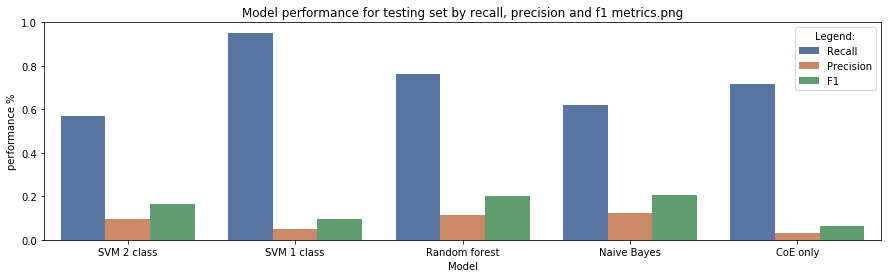

<Figure size 432x288 with 0 Axes>

In [55]:
x = [
    "SVM 2 class",
    "SVM 1 class",
    "Random forest",
    "Naive Bayes",
    "CoE only"
]
y = [recall_svm_test,
     recall_svm_oc_test, 
     recall_rf_test, 
     recall_nb_test, 
     recall_coe_test]
     
     
z = [ preci_svm_test,
     (preci_svm_oc_test),
     (preci_rf_test),
     (preci_nb_test),
     (preci_coe_test) ]
     
k = [(f1_svm_test),
     (f1_svm_oc_test),
     (f1_rf_test),
     (f1_nb_test),
     (f1_coe_test)]

w = [(f1_svm_test),
     (f1_svm_oc_test),
     (f1_rf_test),
     (f1_nb_test),
     (f1_coe_test)]

     
     


models_metric = pd.DataFrame(zip(x*5, ["Recall"]*5+["Precision"]*5+["F1"]*5, y+z+k), columns=["Model", "Legend:", "performance %"])
plt.figure(figsize=(15, 4))
sns.set_palette("deep")
sns.barplot(x="Model", hue="Legend:", y="performance %", data=models_metric)
plt.title("Model performance for testing set by recall, precision and f1 metrics.png")


value_format = "{:.1%}"  # displaying values as percentage with one fractional digit
label_bars(ax, bars, value_format)

plt.show()
plt.savefig("plots/Model_perf_testing_set")


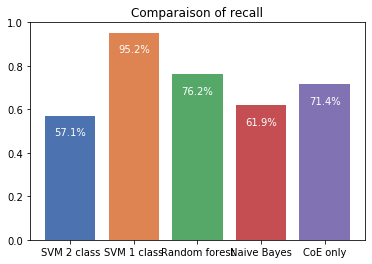

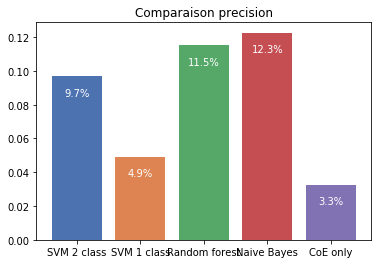

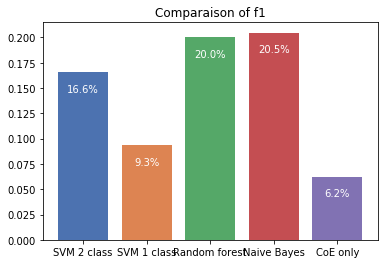

In [53]:
# data = {'SVM': wp_SVM, 'RF':wp_RF, 'NB':wp_NB, 'RL':wp_RL, 'kNN':wp_kNN,'NN':wp_NN}

# names = list(data.keys())
# values = list(data.values())

names = [
    "SVM 2 class",
    "SVM 1 class",
    "Random forest",
    "Naive Bayes",
    "CoE only"
]
values_recall = [recall_svm_test,
     recall_svm_oc_test, 
     recall_rf_test, 
     recall_nb_test, 
     recall_coe_test]
     
     
values_preci = [ preci_svm_test,
     (preci_svm_oc_test),
     (preci_rf_test),
     (preci_nb_test),
     (preci_coe_test) ]
     
values_f1 = [(f1_svm_test),
     (f1_svm_oc_test),
     (f1_rf_test),
     (f1_nb_test),
     (f1_coe_test)]



def label_bars(ax, bars, text_format, **kwargs):
    """
    Attaches a label on every bar of a regular or horizontal bar chart
    """
    ys = [bar.get_y() for bar in bars]
    y_is_constant = all(y == ys[0] for y in ys)  # -> regular bar chart, since all all bars start on the same y level (0)

    if y_is_constant:
        _label_bar(ax, bars, text_format, **kwargs)
    else:
        _label_barh(ax, bars, text_format, **kwargs)

def _label_bar(ax, bars, text_format, **kwargs):
    """
    Attach a text label to each bar displaying its y value
    """
    max_y_value = ax.get_ylim()[1]
    inside_distance = max_y_value * 0.10
    outside_distance = max_y_value * 0.01

    for bar in bars:
        text = text_format.format(bar.get_height())
        text_x = bar.get_x() + bar.get_width() / 2

        is_inside = bar.get_height() >= max_y_value * 0.20
        if is_inside:
            color = "white"
            text_y = bar.get_height() - inside_distance
        else:
            color = "black"
            text_y = bar.get_height() + outside_distance

        ax.text(text_x, text_y, text, ha='center', va='bottom', color=color, **kwargs)


def _label_barh(ax, bars, text_format, **kwargs):
    """
    Attach a text label to each bar displaying its y value
    Note: label always outside. otherwise it's too hard to control as numbers can be very long
    """
    max_x_value = ax.get_xlim()[1]
    distance = max_x_value * 0.0025

    for bar in bars:
        text = text_format.format(bar.get_width())

        text_x = bar.get_width() + distance
        text_y = bar.get_y() + bar.get_height() / 2

        ax.text(text_x, text_y, text, va='center', **kwargs)

        
     
fig, ax = plt.subplots()
bars = ax.bar(names, values_recall, width=0.79, align="center",color=sns.color_palette("deep"))
ax.set_title('Comparaison of recall')
value_format = "{:.1%}"  # displaying values as percentage with one fractional digit
label_bars(ax, bars, value_format)



fig, ax = plt.subplots()
bars = ax.bar(names, values_preci, width=0.79, align="center",color=sns.color_palette("deep"))
ax.set_title('Comparaison precision')
value_format = "{:.1%}"  # displaying values as percentage with one fractional digit
label_bars(ax, bars, value_format)

fig, ax = plt.subplots()
bars = ax.bar(names, values_f1, width=0.79, align="center",color=sns.color_palette("deep"))
ax.set_title('Comparaison of f1')
value_format = "{:.1%}"  # displaying values as percentage with one fractional digit
label_bars(ax, bars, value_format)

